## Clean and Analyze Employee Exit Surveys 
 >In this project, we will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We want to investigate the reasons why some groups of workers are resigning. Our aim to answer two main questions:    <br> 1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? <br>2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Step 1: Read-in the Data

In [32]:
import pandas as pd 
import numpy as np

In [33]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [34]:
print(dete_survey.info())

print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

>- We can see that DETE data has a few columns which are mainly comprised of NaN values. These are: 'Aboriginal', 'Torres Strait', 'South Sea', 'Disability', and 'NESB'

In [35]:
print(dete_survey.head())
tafe_survey.head()

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


>- DETE data columns from contributing factors include several 'not stated' instead of NaN. 
- Multiple columns from both DETE and TAFE have information we do not need to complete our analysis, so we will be dropping these non-essential columns.  

In [36]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')    

In [37]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [38]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

> - The columns we have chosen to drop are the columns which contain extraneous personal information. The columns we are left with have information about the employee positions and their reasons for resigning.

In [39]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [40]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

>- We have updated the column names for 'dete_survey_updated' to be lower case and snakecase with the help of strip() and lower() 
- For 'tafe_survey_updated', we have individually renamed the columns since several names were actually questions. This will make the names much easier to work with.  

In [41]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [42]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

> - Since we are interested in the reasons for the resignations within the company, we will not need to look into the data for the other separation types. We can see DETE has three categories for resignation while TAFE has one.

In [43]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
print(dete_survey_updated['separationtype'].value_counts())
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64


In [44]:
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

> - DETE resignation categories have been condensed into a single category.
- We have also made separate dataframes, dete_resignation and tafe_resignation, which represent information only for employees who have resigned. 

### Check the years in each dataframe for logical inconsistencies:

In [45]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

> - We can see that the DETE cease_date column has values which vary from specifing month and year to just specifing the year. For our analysis, we will just take the year into account. 

In [46]:
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype("float")

In [47]:
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

> - After cleaning up, cease_date to only account for the year, it is much easier to see a trend for the dates when employees have resgined the most. 

In [48]:
dete_resignation['dete_start_date'].value_counts(ascending=True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [49]:
tafe_resignation['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

> - The TAFE cease_date column follows our desired year-only format
- From DETE start_date, we can see that there has been a surge in hiring after 2005. This would explain a proportional amount of workers leaving. 

In [50]:
dete_resignation['institute_service'] = dete_resignation['dete_start_date'] - dete_resignation['cease_date']

> - In TAFE, we have an institute_service column which cotains the lenght of employment. We want to create an analogous column in DETE, so that we can see if persons employed short amounts of time left due to dissatisfaction. 

### Categorizing Employee Dissatisfaction:

In [51]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

> - We can see that the above column has 277 values which are not stated(-). To resolve this, we will make a function which takes in a value and if it a dash, returns True. Else, if it is NaN, it will return np.nan.

In [52]:
def update_val(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

In [53]:
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 
                                                     'Contributing Factors. Job Dissatisfaction', 
                                                 ]].applymap( update_val).any(axis=1, skipna=False)
tafe_resignation_up = tafe_resignation.copy()

> - Apply function we made to TAFE dissatisfaction columns.
- Use any() to create a new column which uses logic to combine TRUE, FALSE, and NaN values

In [54]:
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

dete_resignation_up = dete_resignation.copy()

dete_resignation_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

> - Again, using any() to make a combined column and making a new copy in the dataframe

In [55]:
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'

> - Now, we want to work towards combining the dataframes since their information will be easier to review at once. 
- Adding columns to distinguish between DATE and TAFE once we combine the dataframes.

In [56]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [57]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

>- Use concat() to combine the dataframe copies and dropping any columns which have less than 500 non-NaN values since we will still have all the information needed if they are dropped.

In [62]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

> - The last column we cleaned up is institute_service, we extract the years only and then check if was done correctly.

In [63]:
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

> - Making a function to categorize employees by years spent working for the company. 
- Apply function to institute_service_up 

In [67]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

False    411
True     240
Name: dissatisfied, dtype: int64


> - Check for missing values in dissatisfied column and filling any missing values with False (since it occurs most often)

             dissatisfied
service_cat              
Established     51.612903
Experienced     34.302326
New             29.533679
Veteran         48.529412


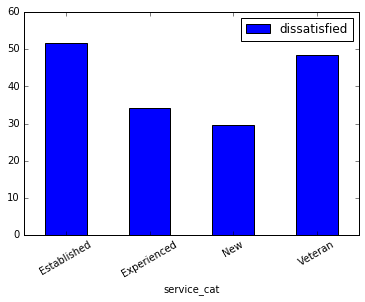

In [70]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')*100
print(dis_pct)

%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

> - Using the pivot_table() method to calculate percentage of dissatisfied employees in each of our designated categories(from transform service column).
- Present bar plot representing dis_pct

The findings from the bar plot are rather surprising, the established and expirienced categories have a larger percentage of dissatisfaction upon leaving.
